In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
# print(train_data.columns)
m,n = train_data.shape
print(f"Number of Houses are: {m} and the number of features for each house are {n}")

Number of Houses are: 1460 and the number of features for each house are 81


In [4]:
# Categorical Data to Numeric data for Regression
train_data["Alley"] = train_data["Alley"].fillna("NA")
train_data["BsmtQual"] = train_data["BsmtQual"].fillna("NA")
train_data["BsmtCond"] = train_data["BsmtCond"].fillna("NA")
train_data["BsmtExposure"] = train_data["BsmtExposure"].fillna("NA")
train_data["BsmtFinType1"] = train_data["BsmtFinType1"].fillna("NA")
train_data["Electrical"] = train_data["Electrical"].fillna("NA")
train_data["FireplaceQu"] = train_data["FireplaceQu"].fillna("NA")
train_data["GarageType"] = train_data["GarageType"].fillna("NA")
Replacement_nums = {"MSZoning": {"A": 0,"I": 0,"RP": 0,"C (all)": 1,"RM": 2,"RH": 3,"RL": 4,"FV": 5},
                    "Alley" : {"Grvl": 0,"Pave": 0,"NA": 1},
                    "Street": {'Pave':0, 'Grvl':1},
                    "LandSlope": {"Gtl": 1,"Mod": 2,"Sev": 3},
                    "BldgType" : {"1Fam": 1,"2FmCon": 0,"Duplx": 0, "TwnhsE": 0,"TwnhsI": 0},
                    "RoofStyle": {"Gable": 1,"Hip": 1,"Gambrel": 0, "Mansard": 0,"Flat": 0, "Shed": 0},
                    "HouseStyle": {'2Story': 0, '1Story': 0, '1.5Fin': 0, '1.5Unf': 1, 'SFoyer':0, 'SLvl':0, '2.5Unf':0,'2.5Fin':0},
                    "RoofMatl": {'CompShg':0, 'WdShngl':1, 'Metal':0, 'WdShake':0, 'Membran':0, 'Tar&Grv':0,'Roll':0, 'ClyTile':0},
                    "ExterQual": {'Gd':3, 'TA':2, 'Ex': 4, 'Fa': 1, 'Po':0},
                    "Foundation": {'PConc':3, 'CBlock':2, 'BrkTil':2, 'Wood':2, 'Slab':1, 'Stone':2},
                    "BsmtQual":{'Gd':1 , 'TA':1 , 'Ex':2 , 'NA':0 , 'Fa':0 },
                    "BsmtCond": {'TA':2, 'Gd':2, 'NA':0, 'Fa':1, 'Po':0, 'Ex':3},
                    "BsmtExposure": {'No':0, 'Gd':2, 'Mn':1, 'Av':2, 'NA':0},
                    "BsmtFinType1": {'GLQ':1, 'ALQ':0, 'Unf':0, 'Rec':0, 'BLQ':0, 'NA':0, 'LwQ':0},
                    "Heating" : {'GasA':0, 'GasW':0, 'Grav':1, 'Wall':1, 'OthW':1, 'Floor':1},
                    "HeatingQC": {'Ex':3, 'Gd':2, 'TA':2, 'Fa':1, 'Po':0},
                    "CentralAir": {'Y':1, 'N':0},
                    "Electrical": {'SBrkr':0, 'FuseF':1, 'FuseA':1, 'FuseP':1, 'Mix':1, 'NA':1},
                    "KitchenQual": {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'Po':1},
                    "FireplaceQu": {'NA':1, 'TA':3, 'Gd':3, 'Fa':2, 'Ex':4, 'Po':1},
                    "GarageType": {'Attchd':1, 'Detchd':0, 'BuiltIn':1, 'CarPort': -1, 'NA': -1, 'Basment':0,'2Types':0},
                    "PavedDrive": {'Y':2, 'N':0, 'P':1},
                    "SaleCondition": {'Normal':3, 'Abnorml':2, 'Partial':4, 'AdjLand':1, 'Alloca':2, 'Family':2},
                                                   }
train_data = train_data.replace(Replacement_nums)
test_data = test_data.replace(Replacement_nums)

In [5]:
train_data_int = train_data.select_dtypes(include=['int64','float']) 
TDI_Corr_SalePrice = train_data_int.corr()["SalePrice"].round(decimals=2).to_numpy()
TDI_Corr_Name = train_data_int.columns.to_numpy()

#Handling nan values
nan_values = dict(train_data_int.mean())
train_data_int = train_data_int.fillna(value=nan_values)
#train_data_int = train_data_int.fillna(value=1)

#Preprocess Test data
test_data_int = test_data.select_dtypes(include=['int64','float']) 
test_data_int = test_data_int.fillna(value=nan_values)

In [6]:
# Selecting the columns based on Pearsson Correlation
for index,name in enumerate(TDI_Corr_Name):
    if abs(TDI_Corr_SalePrice[index]) < 0.1:
        print(f"Correlation less than 0.1 for {TDI_Corr_Name[index]} : {TDI_Corr_SalePrice[index]}")
        for item in list(train_data_int.columns):
            if TDI_Corr_Name[index] == item:
                print(f"Item Delted: {item}")
                del train_data_int[TDI_Corr_Name[index]]
                del test_data_int[TDI_Corr_Name[index]]

x_train_SGD_LR = train_data_int.iloc[:,0:train_data_int.shape[1]-1].to_numpy()
y_train_SGD_LR = train_data_int.iloc[:,train_data_int.shape[1]-1:train_data_int.shape[1]].to_numpy()

x_test_SGD_LR = test_data_int.iloc[:,:].to_numpy()

Correlation less than 0.1 for Id : -0.02
Item Delted: Id
Correlation less than 0.1 for MSSubClass : -0.08
Item Delted: MSSubClass
Correlation less than 0.1 for Street : -0.04
Item Delted: Street
Correlation less than 0.1 for LandSlope : 0.05
Item Delted: LandSlope
Correlation less than 0.1 for HouseStyle : -0.09
Item Delted: HouseStyle
Correlation less than 0.1 for OverallCond : -0.08
Item Delted: OverallCond
Correlation less than 0.1 for RoofStyle : 0.01
Item Delted: RoofStyle
Correlation less than 0.1 for BsmtFinSF2 : -0.01
Item Delted: BsmtFinSF2
Correlation less than 0.1 for LowQualFinSF : -0.03
Item Delted: LowQualFinSF
Correlation less than 0.1 for BsmtHalfBath : -0.02
Item Delted: BsmtHalfBath
Correlation less than 0.1 for 3SsnPorch : 0.04
Item Delted: 3SsnPorch
Correlation less than 0.1 for PoolArea : 0.09
Item Delted: PoolArea
Correlation less than 0.1 for MiscVal : -0.02
Item Delted: MiscVal
Correlation less than 0.1 for MoSold : 0.05
Item Delted: MoSold
Correlation less than

In [7]:
# Splitting into train & test
# x_train, x_test, y_train, y_test = train_test_split(x_train_SGD_LR,y_train_SGD_LR, test_size= 0.01, random_state=1)

# Same test and train 
x_train = x_train_SGD_LR
x_test = x_train_SGD_LR
y_train = y_train_SGD_LR
y_test = y_train_SGD_LR

In [8]:
scalers = []
models = []
test_error = []
for degree in range(1,4):
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    
    scaler = StandardScaler()
    x_train_poly_Norm = scaler.fit_transform(x_train_poly)
    x_test_poly_Norm = scaler.transform(x_test_poly)
    scalers.append(scaler)
    
    sgdr = SGDRegressor(max_iter=1000,alpha=0.0,eta0=0.0005)
    sgdr.fit(x_train_poly_Norm,y_train.reshape(-1))
    print(f"Model got trained in iterations: {sgdr.n_iter_}")
    print(f"Shape of weights: {sgdr.coef_.shape} and intercept: {sgdr.intercept_}")
    models.append(sgdr)
    
    #Here we are using reLu function
    yhat_train = sgdr.predict(x_train_poly_Norm)
    #yhat_train = np.where(yhat_train >= 0,yhat_train,nan_values["SalePrice"])
    yhat_train = np.where(yhat_train >= 0,yhat_train,1)
    yhat_test = sgdr.predict(x_test_poly_Norm)
    #yhat_test = np.where(yhat_test >= 0,yhat_test,nan_values["SalePrice"])
    yhat_test = np.where(yhat_test >= 0,yhat_test,1)
    
    RMSE_log2_train = math.sqrt(((np.log2(y_train) - np.log2(yhat_train.reshape(-1,1)))**2).sum()/len(y_train))
    print(f"The RMSE of log2 of values on training data for degree of polynomial:{degree} is: {RMSE_log2_train}")
    RMSE_log2_test = math.sqrt(((np.log2(y_test) - np.log2(yhat_test.reshape(-1,1)))**2).sum()/len(y_test))
    print(f"The RMSE of log2 of values on testing data for degree of polynomial:{degree} is: {RMSE_log2_test}")
    test_error.append(RMSE_log2_test)
print(f"Degree of polynomial that should be used is: {np.argmin(test_error)+1}")
Model_Degree = np.argmin(test_error)+1

Model got trained in iterations: 140
Shape of weights: (44,) and intercept: [180623.35277234]
The RMSE of log2 of values on training data for degree of polynomial:1 is: 0.46296375029623493
The RMSE of log2 of values on testing data for degree of polynomial:1 is: 0.46296375029623493
Model got trained in iterations: 107
Shape of weights: (1034,) and intercept: [180003.8577432]
The RMSE of log2 of values on training data for degree of polynomial:2 is: 0.16158207551478107
The RMSE of log2 of values on testing data for degree of polynomial:2 is: 0.16158207551478107
Model got trained in iterations: 6
Shape of weights: (16214,) and intercept: [-6.45801181e+08]
The RMSE of log2 of values on training data for degree of polynomial:3 is: 18.116444948167892
The RMSE of log2 of values on testing data for degree of polynomial:3 is: 18.116444948167892
Degree of polynomial that should be used is: 2


The RMSE of log2 of values on training data for degree of polynomial:3 is: 0.16158207551478107


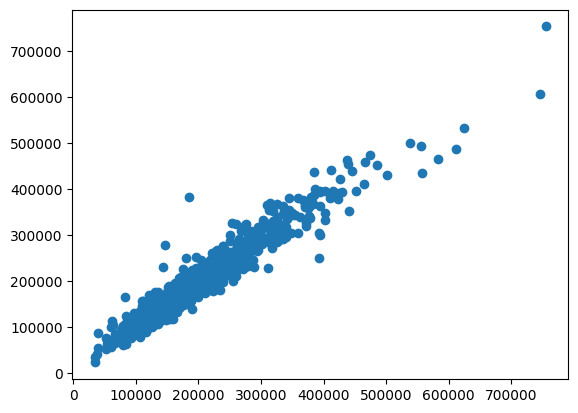

In [9]:
# Predicting values with optimum model 
poly = PolynomialFeatures(Model_Degree,include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_train_poly_Norm = scalers[Model_Degree-1].fit_transform(x_train_poly)

x_test_poly = poly.transform(x_test_SGD_LR)
x_test_poly_Norm = scalers[Model_Degree-1].transform(x_test_poly)


yhat_train = models[Model_Degree-1].predict(x_train_poly_Norm)
yhat_train = np.where(yhat_train >= 0,yhat_train,1)

yhat_test = models[Model_Degree-1].predict(x_test_poly_Norm)
yhat_test = np.where(yhat_test >= 0,yhat_test,1)

RMSE_log2_train = math.sqrt(((np.log2(y_train) - np.log2(yhat_train.reshape(-1,1)))**2).sum()/len(y_train))
print(f"The RMSE of log2 of values on training data for degree of polynomial:{degree} is: {RMSE_log2_train}")

plt.scatter(y_train,yhat_train)
plt.show()

In [10]:
#May be : Fence, Functional, ExterCond, Neighborhood, LandContour, LotShape, Condition1, Condition2, 
#Drop: PoolQC, Utilities,BsmtFinType2, LotConfig, Exterior1st, MasVnrType  , GarageCond
# train_data["MiscFeature"] = train_data["MiscFeature"].fillna("NA")
# feature = "Street"
# plt.scatter(train_data[feature],train_data["SalePrice"])
# plt.show()
# print(train_data[feature].value_counts())
# for item in train_data[feature].unique():
#     print(f"Mean of item: {item} is equal:" + str(train_data[train_data[feature] == item]["SalePrice"].mean()) + "Std. Dev: " + str(train_data[train_data[feature] == item]["SalePrice"].std()))

In [11]:
ID = test_data["Id"]

In [12]:
data = {"Id":list(ID), "SalePrice":list(yhat_test)}
Result = pd.DataFrame(data)
Result.to_csv('submission.csv',index=False)
print(Result)

        Id      SalePrice
0     1461  118473.417240
1     1462  160101.310268
2     1463  175712.130375
3     1464  184267.489305
4     1465  194182.356370
...    ...            ...
1454  2915   70831.451805
1455  2916   76239.279858
1456  2917  130349.446184
1457  2918  113413.740210
1458  2919  240399.814188

[1459 rows x 2 columns]


In [13]:
Result

,Id,SalePrice
0,1461,118473.417240
1,1462,160101.310268
2,1463,175712.130375
3,1464,184267.489305
4,1465,194182.356370
...,...,...
1454,2915,70831.451805
1455,2916,76239.279858
1456,2917,130349.446184
1457,2918,113413.740210
